In [152]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [153]:
df = pd.read_csv('winequality-white.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
X = df[['volatile acidity','chlorides']].values
print(X)


[[0.27  0.045]
 [0.3   0.049]
 [0.28  0.05 ]
 ...
 [0.24  0.041]
 [0.29  0.022]
 [0.21  0.02 ]]


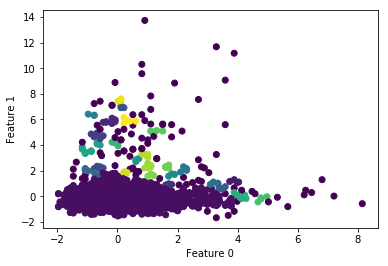

In [155]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cluster the data
dbscan = DBSCAN(eps=0.25, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

In [156]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Number of clusters = {n_clusters_}')

n_noise_ = list(clusters).count(-1)
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 27
Number of noise sample = 94


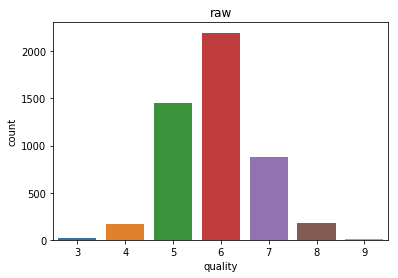

In [157]:
#For this first round, we attempt to do balancing

plt.figure()

sns.countplot('quality', data=df)

plt.title('raw')

plt.show()

In [158]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [159]:
#From graph, qualities 3 and 9 are too small. Therefore we do a mapping to convert them for dropping

dict_quality= {
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8
}

df['quality'] = df['quality'].map(dict_quality)

#drop NaN columns
df = df.dropna()

df.quality.value_counts()

6.0    2198
5.0    1457
7.0     880
8.0     175
4.0     163
Name: quality, dtype: int64

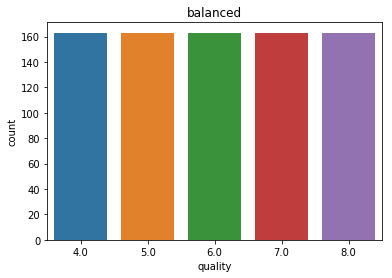

In [170]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the minority class in a separate dataset.
q4_df = shuffled_df.loc[shuffled_df['quality'] == 4]

#Randomly select ? observations from the majority classes
q5_df = shuffled_df.loc[shuffled_df['quality'] == 5].sample(n = 163,random_state=42)

q6_df = shuffled_df.loc[shuffled_df['quality'] == 6].sample(n = 163,random_state=42)

q7_df = shuffled_df.loc[shuffled_df['quality'] == 7].sample(n = 163,random_state=42)

q8_df = shuffled_df.loc[shuffled_df['quality'] == 8].sample(n = 163,random_state=42)


# Concatenate both dataframes again
normalized_df = pd.concat([q4_df, q5_df, q6_df, q7_df, q8_df])

plt.figure()

sns.countplot('quality', data=normalized_df)

plt.title('balanced')

plt.show()

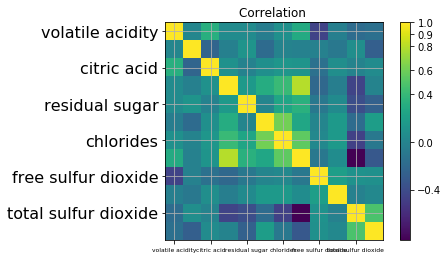

In [171]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(normalized_df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=16)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182E980E1D0>,
      dtype=object)

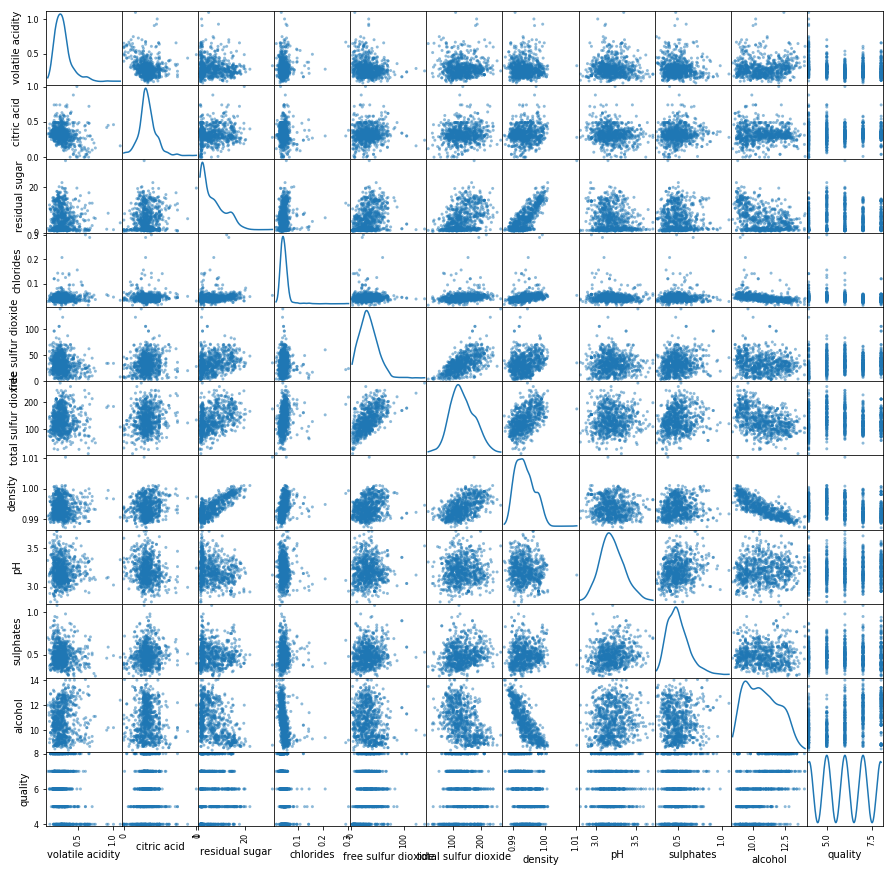

In [172]:
from pandas.plotting import scatter_matrix
scatter_matrix(normalized_df.loc[:,'volatile acidity':'quality'],figsize=(15, 15),diagonal='kde',ax=None)


In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
X = normalized_df[['volatile acidity','chlorides']].values
print(X)


[[0.24  0.046]
 [0.29  0.142]
 [0.49  0.043]
 ...
 [0.36  0.037]
 [0.26  0.049]
 [0.66  0.029]]


In [174]:
normalized_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.016584,0.329899,0.056514,0.060271,-0.050574,0.089945,0.290890,-0.452254,-0.034397,-0.178733,-0.149701
volatile acidity,0.016584,1.000000,-0.224522,-0.030362,0.120079,-0.187926,-0.008338,-0.017716,-0.020118,-0.091873,0.075972,-0.270637
citric acid,0.329899,-0.224522,1.000000,0.098169,-0.013620,0.085717,0.132832,0.123602,-0.142096,0.080407,-0.007040,0.055588
residual sugar,0.056514,-0.030362,0.098169,1.000000,0.165737,0.307634,0.410608,0.800518,-0.202572,-0.044165,-0.447238,-0.007361
chlorides,0.060271,0.120079,-0.013620,0.165737,1.000000,0.006899,0.249668,0.336599,-0.095332,0.049257,-0.387237,-0.252224
free sulfur dioxide,-0.050574,-0.187926,0.085717,0.307634,0.006899,1.000000,0.609156,0.253535,0.009701,0.159906,-0.174681,0.193370
total sulfur dioxide,0.089945,-0.008338,0.132832,0.410608,0.249668,0.609156,1.000000,0.547447,0.029441,0.157182,-0.467077,-0.091645
density,0.290890,-0.017716,0.123602,0.800518,0.336599,0.253535,0.547447,1.000000,-0.094401,0.065005,-0.821279,-0.320873
pH,-0.452254,-0.020118,-0.142096,-0.202572,-0.095332,0.009701,0.029441,-0.094401,1.000000,0.198060,0.109663,0.093974
sulphates,-0.034397,-0.091873,0.080407,-0.044165,0.049257,0.159906,0.157182,0.065005,0.198060,1.000000,-0.021512,0.028819


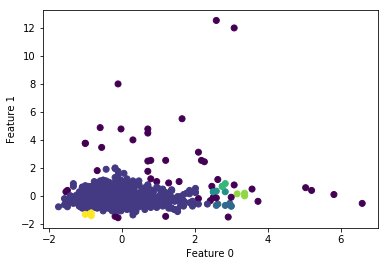

In [175]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cluster the data
dbscan = DBSCAN(eps=0.25, min_samples = 3)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

In [177]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Number of clusters = {n_clusters_}')

n_noise_ = list(clusters).count(-1)
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 6
Number of noise sample = 44
